# Movie Reviews with Bag of Words! 

# What words indicate a positive movie review ?

* Movie reviews: [Maas et al. "Learning Word Vectors for Sentiment Analysis" ACL 2011](http://www.aclweb.org/anthology/P11-1015)
* Written by internet users
* Reviews are either positive or negative
* How can we find which words indicate a positive / negative review ?

In [8]:
import requests
r = requests.get("http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz")
imdb_tgz = r.content

KeyboardInterrupt: 

In [7]:
import io
import re
import tarfile

from tqdm.notebook import tqdm

good_file = re.compile(r"^aclImdb/(test|train)/(pos|neg)/.*\.txt$")

with tarfile.open(fileobj=io.BytesIO(r.content), mode="r:gz") as tgz:
    all_members = tgz.getmembers()
    data_files = list(filter(lambda x: x.isfile() and good_file.match(x.name) is not None, all_members))
    for f in tqdm(data_files):
        tgz.extract(f)

ReadError: not a gzip file

In [ ]:
from sklearn.datasets import load_files
train_data, test_data = load_files("./aclImdb/train", encoding="utf-8"), load_files("./aclImdb/test", encoding="utf-8")

In [ ]:
label2txt = {label: txt for label, txt in enumerate(train_data.target_names)}
txt2label = {txt: label for label, txt in label2txt.items()}

In [ ]:
type(train_data)

sklearn.utils._bunch.Bunch

In [ ]:
X_train, y_train = train_data.data, train_data.target
X_test, y_test = test_data.data, test_data.target

# The data
* `X_train` and `X_test` are `list` of 25000 `str` texts
* `y_train` and `y_test` are `list` of 25000 `int`, either `0` (negative review) or `1` (positive review)


In [ ]:
import numpy as np

print("TRAIN data:")
print("class balance: ", np.bincount(y_train))
print()
print("TEST data:")
print("class balance: ", np.bincount(y_train))

TRAIN data:
class balance:  [12500 12500]

TEST data:
class balance:  [12500 12500]


In [ ]:
import termcolor

In [ ]:
import termcolor
import textwrap

print(termcolor.colored("Review with label: ", "black", attrs=["bold"], force_color=True), termcolor.colored(label2txt[y_train[0]], "green", attrs=["bold"], force_color=True))
print(textwrap.fill(X_train[0], 120))
print()
print(termcolor.colored("Review with label: ", "black", attrs=["bold"], force_color=True), termcolor.colored(label2txt[y_train[12500]], "red", attrs=["bold"], force_color=True))
print(textwrap.fill(X_train[12500], 120))

Review with label:  pos
Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via
slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided
to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not
a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of
explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a
film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see.
<br /><br />Flawed but honest with a terrible honesty.

Review with label:  neg
SPOILERS All too often, Hollywood's Shakespeare adaptations entertaining pieces of cinema. Beautifully shot they are
well performed and faithful to the text. Films including Branagh's "H

# Install packages

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=d118bb4e5ecc9c6e19cfb4f39224f167c9c4a260b0397addba5eda8a86072ae1
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


# Some exploration of our Data 

**Count words**
* Let's see which words are being used
* Count them
* We obtain Bag-of-Words vectors

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
from gensim.corpora import Dictionary

**How many words in our vocabulary ?**

In [ ]:
X_train_tokenized = [word_tokenize(x) for x in tqdm(X_train)]

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
d = Dictionary(X_train_tokenized)

In [ ]:
import rich

from rich.console import Console
from rich.table import Table

N = 20

table = Table(title=f"Top-{N} Most Frequent Tokens ({d.num_docs} documents, {d.num_pos} tokens, {len(d)} words in dictionary)")

table.add_column("Token", justify="left", style="black")
table.add_column("Corpus Frequency", justify="right")
table.add_column("% of Tokens", justify="right")
table.add_column("Document Frequency", justify="right")
table.add_column("% of Documents", justify="right")

for token, frequency in d.most_common(n=N):
    percent_tokens = frequency / d.num_pos
    doc_frequency = d.dfs[d.token2id[token]]
    percent_doc = doc_frequency / d.num_docs
    table.add_row(token, str(frequency), f"{percent_tokens:.1%}", str(doc_frequency), f"{percent_doc:.1%}")

console = Console()
console.print(table)

 Top-20 Most Frequent Tokens (25000 documents, 7065338 tokens, 132093 words in  
                                  dictionary)                                   
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Token ┃ Corpus Frequency ┃ % of Tokens ┃ Document Frequency ┃ % of Documents ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ the   │           289359 │        4.1% │              24674 │          98.7% │
│ ,     │           275887 │        3.9% │              24054 │          96.2% │
│ .     │           236573 │        3.3% │              24685 │          98.7% │
│ and   │           156416 │        2.2% │              24041 │          96.2% │
│ a     │           156158 │        2.2% │              24060 │          96.2% │
│ of    │           143692 │        2.0% │              23685 │          94.7% │
│ to    │           133446 │        1.9% │              23423 │          93.7% │
│ is    │           109177 │        1.5% │              22469 │          89.9% │
│ /     │           102115 │        1.4% │              14711 │          58.8% │
│ >     │           102036 │        1.4% │              14681 │          58.7% │
│ <     │           101971 │        1.4% │              14671 │          58.7% │
│ br    │           101870 │        1.4% │              14665 │          58.7% │
│ in    │            87145 │        1.2% │              21744 │          87.0% │
│ I     │            81531 │        1.2% │              19245 │          77.0% │
│ it    │            76616 │        1.1% │              21022 │          84.1% │
│ that  │            70130 │        1.0% │              20051 │          80.2% │
│ 's    │            61984 │        0.9% │              17879 │          71.5% │
│ this  │            60544 │        0.9% │              20994 │          84.0% │
│ was   │            49994 │        0.7% │              16321 │          65.3% │
│ The   │            43999 │        0.6% │              17514 │          70.1% │
└───────┴──────────────────┴─────────────┴────────────────────┴────────────────┘

# Classify with Logistic Regression

**Transform documents into a feature matrix**
* `X_train_bow` is the feature matrix
* 1 row = 1 document
* 1 column = 1 word of the dictionary
* 1 cell = how many times did we see a word in a document


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
# With these settings, we reproduce exactly what was done above
vec = CountVectorizer(
    lowercase=False,
    token_pattern=None,
    analyzer=word_tokenize
)

X_train_bow = vec.fit_transform(X_train)

In [ ]:
# See it says <25000x132093> = 25000 documents, 132093 words in dictionary, like above
X_train_bow

<25000x132093 sparse matrix of type '<class 'numpy.int64'>'
	with 3842837 stored elements in Compressed Sparse Row format>

In [ ]:
# Indices of row 0 indicates which tokens have been seen in document 0, given by token_id
X_train_bow[0].indices

array([ 57275,  18580,  93273, 131588, 124020, 123249,   3678,  78685,
       109722, 130251, 125653,  64771,  96526, 131066,  75379, 129949,
       123176,  74199,   3702,  69439,  99124, 120877, 128286, 116902,
       123021,  68290,   4116,  29523,  66377,  99058,  62625,  63294,
        57543,  63617,  97765, 101502,  62975,  82192,  88492, 130171,
        86489,  72927, 130606,  82937,  69460,  68177,  89484, 102330,
        73179, 103328, 130947,  71107,  73869,   7093,  64776,   4312,
         7121,  91284, 100758, 104518,  98451,  65745,  84134,  97936,
       122986,  81195,  59716,  58212,  85690,  91348, 110894, 107633,
        29008, 122789,  79451,  98331,  58169, 131607, 120886,  63238,
       122935,    562,      7,  81055, 122956,  83928, 126363, 102523,
         3110, 116720,  80277,  59310,  60270,  60661,  93928, 114301,
        23245,  87875, 130601, 122799,  87884], dtype=int32)

In [ ]:
console = Console(record=True, width=40)
table = Table(title=f"Tokens in sample")

table.add_column("Token ID", justify="right")
table.add_column("Token", justify="left")
table.add_column("Count", justify="right")

words = vec.get_feature_names_out()
for token_id, _ in zip(sorted(X_train_bow[0].indices), range(20)):
    table.add_row(str(token_id), words[token_id], str(X_train_bow[0][0, token_id]))

console.print(table)
console.save_svg("bow.svg", title="Bag of Words")

          Tokens in sample           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Token ID ┃ Token          ┃ Count ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│        7 │ '              │     2 │
│      562 │ 'Elephant      │     1 │
│     3110 │ 'rationalistic │     1 │
│     3678 │ ,              │     2 │
│     3702 │ -              │     3 │
│     4116 │ .              │     4 │
│     4312 │ /              │     4 │
│     7093 │ <              │     4 │
│     7121 │ >              │     4 │
│    18580 │ Day            │     1 │
│    23245 │ Flawed         │     1 │
│    29008 │ In             │     1 │
│    29523 │ It             │     2 │
│    57275 │ Zero           │     1 │
│    57543 │ a              │     6 │
│    58169 │ actions        │     1 │
│    58212 │ actors         │     1 │
│    59310 │ almost         │     1 │
│    59716 │ and            │     2 │
│    60270 │ anything       │     1 │
└──────────┴────────────────┴───────┘

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# With these settings, we reproduce exactly what was done above
vec_tfidf = TfidfVectorizer(
    lowercase=False,
    token_pattern=None,
    analyzer=word_tokenize
)

X_train_tfidf = vec_tfidf.fit_transform(X_train)

In [ ]:
# See it says <25000x132093> = 25000 documents, 132093 words in dictionary, like above
X_train_tfidf

<25000x132093 sparse matrix of type '<class 'numpy.float64'>'
	with 3842837 stored elements in Compressed Sparse Row format>

In [ ]:
console = Console(record=True, width=80)
table = Table(title=f"Tokens in sample")

table.add_column("Token ID", justify="right")
table.add_column("Token", justify="left")
table.add_column("Count (TF)", justify="right")
table.add_column("Doc Frequency (% corpus)", justify="right")
table.add_column("TF-IDF", justify="right")

words = vec.get_feature_names_out()
for token_id, _ in zip(sorted(X_train_bow[0].indices), range(20)):
    table.add_row(str(token_id), words[token_id], f"{X_train_bow[0][0, token_id]}", f"{d.dfs[d.token2id[words[token_id]]] / d.num_docs:.3%}", f"{X_train_tfidf[0][0, token_id]:.3f}")

console.print(table)
console.save_svg("tfidf.svg", title="Bag of Words - TF-IDF")

                               Tokens in sample                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Token ID ┃ Token          ┃ Count (TF) ┃ Doc Frequency (% corpus) ┃ TF-IDF ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│        7 │ '              │          2 │                  18.584% │  0.093 │
│      562 │ 'Elephant      │          1 │                   0.004% │  0.181 │
│     3110 │ 'rationalistic │          1 │                   0.004% │  0.181 │
│     3678 │ ,              │          2 │                  96.216% │  0.036 │
│     3702 │ -              │          3 │                  16.028% │  0.148 │
│     4116 │ .              │          4 │                  98.740% │  0.070 │
│     4312 │ /              │          4 │                  58.844% │  0.106 │
│     7093 │ <              │          4 │                  58.684% │  0.107 │
│     7121 │ >              │          4 │                  58.724% │  0.107 │
│    18580 │ Day            │          1 │                   0.880% │  0.100 │
│    23245 │ Flawed         │          1 │                   0.012% │  0.169 │
│    29008 │ In             │          1 │                  18.272% │  0.047 │
│    29523 │ It             │          2 │                  44.860% │  0.063 │
│    57275 │ Zero           │          1 │                   0.320% │  0.117 │
│    57543 │ a              │          6 │                  96.240% │  0.108 │
│    58169 │ actions        │          1 │                   1.080% │  0.096 │
│    58212 │ actors         │          1 │                  13.884% │  0.052 │
│    59310 │ almost         │          1 │                  10.140% │  0.057 │
│    59716 │ and            │          2 │                  96.164% │  0.036 │
│    60270 │ anything       │          1 │                   9.856% │  0.058 │
└──────────┴────────────────┴────────────┴──────────────────────────┴────────┘

**Logistic Regression**

Reminder: logistic regression for binary classification estimates the probability of a sample $x$ to belong to the positive class, based on the features of $x$

$x = {x_1, x_2, \cdots, x_V}$

$\textrm{Pr}\left[x \in \textrm{pos}\right] = \sigma\left( \alpha_1x_1 + \alpha_2x_2 + \cdots + \alpha_Vx_V \right)$


In [ ]:
reg = LogisticRegression(max_iter=10000)
reg.fit(X_train_bow, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
X_test_bow = vec.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true=y_test, y_pred=reg.predict(X_test_bow)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     12500
           1       0.88      0.87      0.87     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



# Which words indicate a positive review ?

* Let's use the coefficients of logistic regression
* $x_i$ are token counts, we know $x_i>0$
* $\alpha_i > 0$ = the presence of the $i$-th word of dictionary indicates a positive review (because it increases the probability that $x$ belongs to the positive class)
* $\alpha_i < 0$ = the presence of the $i$-th word of dictionary indicates a negative review (because it increases the probability that $x$ belongs to the negative class)
* $\alpha_i>0, \alpha_j > 0$ and $\alpha_i > \alpha_j$ = the $i$-th word of dictionary is **more** associated to a positive review than the $j$-th word


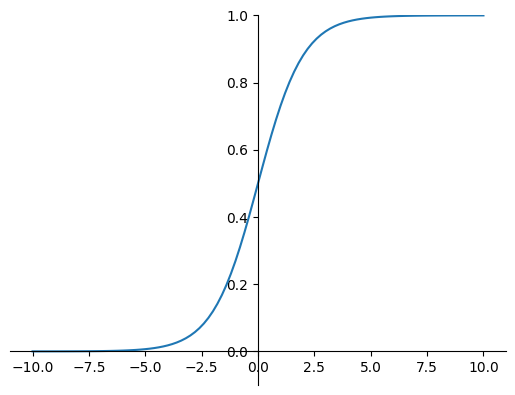

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(1)

x = np.linspace(-10, 10, num=101, endpoint=True)
y = 1.0 / (1.0 + np.exp(-x))

ax.plot(x, y)

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(-0.1, 1.0)
plt.show(f)
f.savefig("sigmoid.svg")

In [ ]:
import eli5

In [ ]:
# ELI5 relies on the vectorizer having a method get_feature_names, but it is deprecated and was removed from sklearn CountVectorizer...
# We can manually correct this
vec.get_feature_names = vec.get_feature_names_out

In [ ]:
eli5.show_weights(reg, vec=vec, top=20, target_names=['negative', 'positive'])

In [ ]:
eli5.explain_prediction(reg, X_test[0], vec=vec, target_names=['negative', 'positive'])

Explanation(estimator='LogisticRegression(max_iter=10000)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='positive', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='fun', weight=0.6498836399849668, std=None, value=1.0), FeatureWeight(feature='well', weight=0.5615931522775425, std=None, value=1.0), FeatureWeight(feature='Patricia', weight=0.38474370080563114, std=None, value=1.0), FeatureWeight(feature='beautiful', weight=0.3820504654138339, std=None, value=1.0), FeatureWeight(feature='flick', weight=0.30934209705360405, std=None, value=1.0), FeatureWeight(feature='together', weight=0.3001074412682461, std=None, value=1.0), FeatureWeight(feature='hate', weight=0.2748020129783864, std=None, value=2.0), FeatureWeight(feature='and', weight=0.25565552352688203, std=None, value=3.0), FeatureWeight(feature='gorgeous', weight=0.23851256003095783, std=None, value=1.0), FeatureWeight(feature='Like', weight=0.21145370852462492, std=None, value=1.0), FeatureWeight(feature='hip', weight=0.1968835964873281, std=None, value=1.0), FeatureWeight(feature='Miramax', weight=0.16556105346721028, std=None, value=1.0), FeatureWeight(feature='Lisa', weight=0.1607919844650598, std=None, value=1.0), FeatureWeight(feature='Congratulations', weight=0.14456908153582257, std=None, value=1.0), FeatureWeight(feature='&', weight=0.131407112071, std=None, value=1.0), FeatureWeight(feature='the', weight=0.12156077214141589, std=None, value=3.0), FeatureWeight(feature='watch', weight=0.1155759455082479, std=None, value=1.0), FeatureWeight(feature='she', weight=0.08988540080822546, std=None, value=2.0), FeatureWeight(feature='up', weight=0.08070811588272236, std=None, value=1.0), FeatureWeight(feature='as', weight=0.0696471170121257, std=None, value=2.0), FeatureWeight(feature='!', weight=0.060331722038662744, std=None, value=1.0), FeatureWeight(feature='Krueger', weight=0.05686213505896127, std=None, value=1.0), FeatureWeight(feature='funky', weight=0.05542074729028019, std=None, value=1.0), FeatureWeight(feature='is', weight=0.04166063499959124, std=None, value=1.0), FeatureWeight(feature='-', weight=0.036788458520626684, std=None, value=1.0), FeatureWeight(feature='work', weight=0.03380172233632208, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=0.024843350686902105, std=None, value=1.0), FeatureWeight(feature='Goran', weight=0.022416784278982655, std=None, value=1.0), FeatureWeight(feature=',', weight=0.019287963856510028, std=None, value=2.0), FeatureWeight(feature='her', weight=0.018565505691684813, std=None, value=1.0), FeatureWeight(feature='movie', weight=0.017859195179748162, std=None, value=1.0), FeatureWeight(feature='Visnjic', weight=0.0004228187759209912, std=None, value=1.0), FeatureWeight(feature='TALENTED', weight=4.792751186893538e-05, std=None, value=1.0)], neg=[FeatureWeight(feature='clothing', weight=-0.5748507349148869, std=None, value=1.0), FeatureWeight(feature='Heather', weight=-0.5064244571015685, std=None, value=2.0), FeatureWeight(feature='Director', weight=-0.3227059920853375, std=None, value=1.0), FeatureWeight(feature='lights', weight=-0.23355040015824677, std=None, value=1.0), FeatureWeight(feature='surroundings', weight=-0.2014362850845204, std=None, value=1.0), FeatureWeight(feature='{', weight=-0.17980240369424624, std=None, value=1.0), FeatureWeight(feature='}', weight=-0.1736070436091427, std=None, value=1.0), FeatureWeight(feature='this', weight=-0.16025030630717516, std=None, value=2.0), FeatureWeight(feature='hysterical', weight=-0.15094501120431256, std=None, value=1.0), FeatureWeight(feature='literally', weight=-0.150743500169584, std=None, value=1.0), FeatureWeight(feature='minor', weight=-0.1374209250579013, std=None, value=1.0), FeatureWeight(feature='.', weight=-0.13608935617251136, std=None, value=4.0), FeatureWeight(feature='because', weight=-0.13028654513257207, std=None, value=2.0), FeatureWeight(feature="n't", weight=-0.128029

# Lets do the same thing we did above with some Preprocessing of our Data (Corpus) and make a machine learning pipeline towards the end

In [ ]:
def create_table(dictionary: Dictionary, n: int = 10) -> Table:
    table = Table(title=f"Top-{n} Most Frequent Tokens ({d.num_docs} documents, {d.num_pos} tokens, {len(d)} words in dictionary)")

    table.add_column("Token", justify="left", no_wrap=True)
    table.add_column("Corpus Frequency", justify="right")
    table.add_column("% of Tokens", justify="right")
    table.add_column("Document Frequency", justify="right")
    table.add_column("% of Documents", justify="right")

    for token, frequency in d.most_common(n=n):
        percent_tokens = frequency / d.num_pos
        doc_frequency = d.dfs[d.token2id[token]]
        percent_doc = doc_frequency / d.num_docs
        table.add_row(token, str(frequency), f"{percent_tokens:.1%}", str(doc_frequency), f"{percent_doc:.1%}")

    return table

**1st Pre-Processing: Lowercase**

In [ ]:
def lowercase(text: str) -> list[str]:
    """Tokenize and preprocess the text.

    Normalize the text to lowercase

    Returns:
        tokens: a list of tokens
    """
    return [x.lower() for x in word_tokenize(text)]

In [ ]:
X_train_tokenized = [lowercase(x) for x in tqdm(X_train)]

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
d = Dictionary(X_train_tokenized)

In [ ]:
console = Console(record=True, width=80)
t = create_table(d, 20)
console.print(t, justify="center")
console.save_svg("all_vocab.svg", title="Vocabulary")

 Top-20 Most Frequent Tokens (25000 documents, 7065338 tokens, 111725 words in  
                                  dictionary)                                   
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Token ┃ Corpus Frequency ┃ % of Tokens ┃ Document Frequency ┃ % of Documents ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ the   │           334840 │        4.7% │              24791 │          99.2% │
│ ,     │           275887 │        3.9% │              24054 │          96.2% │
│ .     │           236573 │        3.3% │              24685 │          98.7% │
│ and   │           163477 │        2.3% │              24159 │          96.6% │
│ a     │           162304 │        2.3% │              24173 │          96.7% │
│ of    │           145404 │        2.1% │              23721 │          94.9% │
│ to    │           135153 │        1.9% │              23459 │          93.8% │
│ is    │           110284 │        1.6% │              22522 │          90.1% │
│ /     │           102115 │        1.4% │              14711 │          58.8% │
│ >     │           102036 │        1.4% │              14681 │          58.7% │
│ <     │           101971 │        1.4% │              14671 │          58.7% │
│ br    │           101871 │        1.4% │              14666 │          58.7% │
│ it    │            95024 │        1.3% │              22207 │          88.8% │
│ in    │            93197 │        1.3% │              22004 │          88.0% │
│ i     │            86747 │        1.2% │              19825 │          79.3% │
│ this  │            75566 │        1.1% │              22607 │          90.4% │
│ that  │            73011 │        1.0% │              20292 │          81.2% │
│ 's    │            62166 │        0.9% │              17895 │          71.6% │
│ was   │            50383 │        0.7% │              16377 │          65.5% │
│ as    │            46834 │        0.7% │              16103 │          64.4% │
└───────┴──────────────────┴─────────────┴────────────────────┴────────────────┘

**2nd Preprocessing: lowercase + stopping**

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [ ]:
print(stopwords)

{'out', 'when', 'yourselves', 'whom', 'can', 'under', "shouldn't", 'same', "haven't", 'now', 'of', 'about', 'nor', "mustn't", "you'll", 'herself', 'as', 's', 'in', 'both', 'below', 'through', 'what', 'before', 'wouldn', 'needn', 'aren', "mightn't", 'shouldn', 'but', 'had', 'because', 'up', 'here', 'her', 'than', 'each', 'll', 'didn', 'from', 'weren', "that'll", 'then', 'i', 've', 'at', 'been', 'were', "needn't", 'between', 'not', 'other', 'the', "she's", 'all', "couldn't", 'me', 'why', 'our', 'wasn', 'too', 'only', "you've", 'by', 'into', 'theirs', 'won', 'until', 'himself', 'doing', 'there', 'your', 'does', 'those', 'mustn', 'am', 'he', 'most', 'so', 'which', 'a', 'she', 'has', 'who', 'again', 'shan', 'hasn', 'doesn', 'isn', 'during', 'that', 'themselves', 'y', 'very', 'ma', 'yourself', 'are', 'on', 'hadn', 'over', 'm', 'couldn', "wouldn't", 'my', 'o', 'few', 'its', 'no', 'be', 'their', "don't", 'do', 'this', 'them', 'have', 'if', 'itself', 't', 'with', "shan't", 'after', "you'd", 'su

In [ ]:
def lower_stop(text: str, stopwords: set[str]) -> list[str]:
    """Tokenize and preprocess the text.

    Normalize the text to lowercase and remove stopwords.

    Returns:
        tokens: a list of tokens
    """
    tokens = lowercase(text)
    return [x for x in tokens if x not in stopwords]

In [ ]:
X_train_tokenized = [lower_stop(text=x, stopwords=stopwords) for x in tqdm(X_train)]

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
console = Console(record=True, width=120)
d = Dictionary(X_train_tokenized)
t = create_table(d, 20)
console.print(t)


 Top-20 Most Frequent Tokens (25000 documents, 4280394 tokens, 111577 words in  
                                  dictionary)                                   
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Token ┃ Corpus Frequency ┃ % of Tokens ┃ Document Frequency ┃ % of Documents ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ ,     │           275887 │        6.4% │              24054 │          96.2% │
│ .     │           236573 │        5.5% │              24685 │          98.7% │
│ /     │           102115 │        2.4% │              14711 │          58.8% │
│ >     │           102036 │        2.4% │              14681 │          58.7% │
│ <     │           101971 │        2.4% │              14671 │          58.7% │
│ br    │           101871 │        2.4% │              14666 │          58.7% │
│ 's    │            62166 │        1.5% │              17895 │          71.6% │
│ movie │            42595 │        1.0% │              15101 │          60.4% │
│ film  │            38758 │        0.9% │              13719 │          54.9% │
│ )     │            36175 │        0.8% │              13495 │          54.0% │
│ (     │            35397 │        0.8% │              13361 │          53.4% │
│ n't   │            33379 │        0.8% │              14839 │          59.4% │
│ ''    │            33129 │        0.8% │              11488 │          46.0% │
│ ``    │            32857 │        0.8% │              11507 │          46.0% │
│ one   │            25893 │        0.6% │              13893 │          55.6% │
│ !     │            24560 │        0.6% │               8595 │          34.4% │
│ like  │            19745 │        0.5% │              11477 │          45.9% │
│ ?     │            16088 │        0.4% │               7388 │          29.6% │
│ good  │            14658 │        0.3% │               9439 │          37.8% │
│ would │            13387 │        0.3% │               8573 │          34.3% │
└───────┴──────────────────┴─────────────┴────────────────────┴────────────────┘

**3rd Preprocessing: accept only alphabetical tokens**

In [ ]:
def lower_stop_only_alpha(text: str, stopwords: set[str]) -> list[str]:
    """Tokenize and preprocess the text.

    Normalize the text to lowercase, remove stopwords, remove tokens
    that are not entirely made of letters, remove tokens with only 1 character.

    Returns:
        tokens: a list of tokens
    """
    own_stopwords = {"br"}
    tokens = lower_stop(text=text, stopwords=stopwords | own_stopwords)
    return [x for x in tokens if x.isalpha() and len(x) > 1]

In [ ]:
X_train_tokenized = [lower_stop_only_alpha(text=x, stopwords=stopwords) for x in tqdm(X_train)]

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
d = Dictionary(X_train_tokenized)

In [ ]:
console = Console(record=True, width=120)
t = create_table(d, 20)
console.print(t)
console.save_svg("alpha_vocab.svg", title="Vocabulary")

  Top-20 Most Frequent Tokens (25000 documents, 2860907 tokens, 71325 words in   
                                   dictionary)                                   
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Token  ┃ Corpus Frequency ┃ % of Tokens ┃ Document Frequency ┃ % of Documents ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ movie  │            42595 │        1.5% │              15101 │          60.4% │
│ film   │            38758 │        1.4% │              13719 │          54.9% │
│ one    │            25893 │        0.9% │              13893 │          55.6% │
│ like   │            19745 │        0.7% │              11477 │          45.9% │
│ good   │            14658 │        0.5% │               9439 │          37.8% │
│ would  │            13387 │        0.5% │               8573 │          34.3% │
│ even   │            12609 │        0.4% │               8397 │          33.6% │
│ time   │            11899 │        0.4% │               8327 │          33.3% │
│ really │            11702 │        0.4% │               7609 │          30.4% │
│ story  │            11583 │        0.4% │               7457 │          29.8% │
│ see    │            11278 │        0.4% │               7982 │          31.9% │
│ much   │             9611 │        0.3% │               7004 │          28.0% │
│ well   │             9498 │        0.3% │               6937 │          27.7% │
│ could  │             9377 │        0.3% │               6819 │          27.3% │
│ get    │             9235 │        0.3% │               6730 │          26.9% │
│ people │             9168 │        0.3% │               6167 │          24.7% │
│ also   │             9099 │        0.3% │               6417 │          25.7% │
│ bad    │             8982 │        0.3% │               5762 │          23.0% │
│ great  │             8935 │        0.3% │               6255 │          25.0% │
│ first  │             8882 │        0.3% │               6309 │          25.2% │
└────────┴──────────────────┴─────────────┴────────────────────┴────────────────┘

**4th Preprocessing - Stemming**

* Reduces the vocabulary by reducing plurals, conjugations to their root form
* "making", "makes", "made" are transformed into "make"
* "cats", "cat" transform into "cat"
* **but** "movie" is transformed into "movi"

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
porter = PorterStemmer()

In [ ]:
porter.stem("cats")

'cat'

In [ ]:
porter.stem("making")

'make'

In [ ]:
porter.stem("movie")

'movi'

In [ ]:
def lower_stop_only_alpha_stem(text: str, stopwords: list[str]) -> list[str]:
    tokens = lower_stop_only_alpha(text, stopwords)
    return [porter.stem(x) for x in tokens]

In [ ]:
X_train_tokenized = [lower_stop_only_alpha_stem(text=x, stopwords=stopwords) for x in tqdm(X_train)]

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
d = Dictionary(X_train_tokenized)

In [ ]:
console = Console(record=True, width=120)
t = create_table(d, 20)
console.print(t)
console.save_svg("stem.svg", title="Vocabulary")

   Top-20 Most Frequent Tokens (25000 documents, 2860907 tokens, 48426 words in   
                                   dictionary)                                    
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Token   ┃ Corpus Frequency ┃ % of Tokens ┃ Document Frequency ┃ % of Documents ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ movi    │            50022 │        1.7% │              16039 │          64.2% │
│ film    │            46628 │        1.6% │              14710 │          58.8% │
│ one     │            26816 │        0.9% │              14115 │          56.5% │
│ like    │            22248 │        0.8% │              12391 │          49.6% │
│ time    │            15226 │        0.5% │               9936 │          39.7% │
│ good    │            14866 │        0.5% │               9540 │          38.2% │
│ make    │            14530 │        0.5% │               9485 │          37.9% │
│ get     │            14042 │        0.5% │               8962 │          35.8% │
│ see     │            13881 │        0.5% │               9274 │          37.1% │
│ charact │            13873 │        0.5% │               8169 │          32.7% │
│ watch   │            13685 │        0.5% │               9058 │          36.2% │
│ would   │            13387 │        0.5% │               8573 │          34.3% │
│ even    │            12856 │        0.4% │               8529 │          34.1% │
│ stori   │            12732 │        0.4% │               7836 │          31.3% │
│ realli  │            11702 │        0.4% │               7609 │          30.4% │
│ scene   │            10306 │        0.4% │               6436 │          25.7% │
│ well    │             9874 │        0.3% │               7027 │          28.1% │
│ look    │             9720 │        0.3% │               6734 │          26.9% │
│ show    │             9676 │        0.3% │               5328 │          21.3% │
│ much    │             9611 │        0.3% │               7004 │          28.0% │
└─────────┴──────────────────┴─────────────┴────────────────────┴────────────────┘

**5th Preprocessing - NGrams**

* 2-grams are made of 2 consecutive tokens in the text
* "the cat is blue" has 2 grams `["the", "cat"], ["cat", "is"], ["is", "blue"]`

In [ ]:
from more_itertools import windowed

In [ ]:
def get_ngrams(tokens: list[str], n: int) -> list[str]:
    return [" ".join(x) for x in windowed(tokens, n=n)]

In [ ]:
tokens = lower_stop("I live in new york city", [])
print(tokens)

['i', 'live', 'in', 'new', 'york', 'city']


In [ ]:
print(get_ngrams(tokens, n=2))

['i live', 'live in', 'in new', 'new york', 'york city']


In [ ]:
print(get_ngrams(tokens, n=3))

['i live in', 'live in new', 'in new york', 'new york city']


In [ ]:
def lower_stop_only_alpha_stem_ngrams(text: str, stopwords: list[str], ngrams: int) -> list[str]:
    tokens = lower_stop_only_alpha_stem(text, stopwords)
    n_grams = get_ngrams(tokens, ngrams)
    return n_grams


In [ ]:
lower_stop_only_alpha_stem_ngrams("I live in the middle of new york city.", stopwords=stopwords, ngrams=3)

['live middl new', 'middl new york', 'new york citi']

In [ ]:
X_train_tokenized = [lower_stop_only_alpha_stem_ngrams(x, stopwords, 2) for x in tqdm(X_train)]

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
d = Dictionary(X_train_tokenized)

In [ ]:
console = Console(record=True, width=120)
t = create_table(d, 20)
console.print(t)
console.save_svg("bigrams.svg", title="Vocabulary")

     Top-20 Most Frequent Tokens (25000 documents, 2835907 tokens, 1468421 words in      
                                       dictionary)                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Token          ┃ Corpus Frequency ┃ % of Tokens ┃ Document Frequency ┃ % of Documents ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ look like      │             1793 │        0.1% │               1553 │           6.2% │
│ watch movi     │             1526 │        0.1% │               1380 │           5.5% │
│ ever seen      │             1267 │        0.0% │               1202 │           4.8% │
│ special effect │             1110 │        0.0% │                971 │           3.9% │
│ even though    │             1041 │        0.0% │                952 │           3.8% │
│ movi like      │              987 │        0.0% │                911 │           3.6% │
│ movi ever      │              985 │        0.0% │                916 │           3.7% │
│ see movi       │              975 │        0.0% │                899 │           3.6% │
│ main charact   │              924 │        0.0% │                816 │           3.3% │
│ one best       │              908 │        0.0% │                841 │           3.4% │
│ wast time      │              895 │        0.0% │                831 │           3.3% │
│ make movi      │              878 │        0.0% │                811 │           3.2% │
│ year old       │              869 │        0.0% │                762 │           3.0% │
│ good movi      │              781 │        0.0% │                732 │           2.9% │
│ watch film     │              780 │        0.0% │                728 │           2.9% │
│ seem like      │              761 │        0.0% │                706 │           2.8% │
│ horror movi    │              741 │        0.0% │                566 │           2.3% │
│ want see       │              726 │        0.0% │                689 │           2.8% │
│ new york       │              724 │        0.0% │                566 │           2.3% │
│ much better    │              720 │        0.0% │                680 │           2.7% │
└────────────────┴──────────────────┴─────────────┴────────────────────┴────────────────┘

In [ ]:
t = create_table(d, 200)
console.print(t)

  Top-200 Most Frequent Tokens (25000 documents, 8507721 tokens, 2786954 words in   
                                    dictionary)                                     
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Token     ┃ Corpus Frequency ┃ % of Tokens ┃ Document Frequency ┃ % of Documents ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ movi      │            50022 │        0.6% │              16039 │          64.2% │
│ film      │            46628 │        0.5% │              14710 │          58.8% │
│ one       │            26816 │        0.3% │              14115 │          56.5% │
│ like      │            22248 │        0.3% │              12391 │          49.6% │
│ time      │            15226 │        0.2% │               9936 │          39.7% │
│ good      │            14866 │        0.2% │               9540 │          38.2% │
│ make      │            14530 │        0.2% │               9485 │          37.9% │
│ get       │            14042 │        0.2% │               8962 │          35.8% │
│ see       │            13881 │        0.2% │               9274 │          37.1% │
│ charact   │            13873 │        0.2% │               8169 │          32.7% │
│ watch     │            13685 │        0.2% │               9058 │          36.2% │
│ would     │            13387 │        0.2% │               8573 │          34.3% │
│ even      │            12856 │        0.2% │               8529 │          34.1% │
│ stori     │            12732 │        0.1% │               7836 │          31.3% │
│ realli    │            11702 │        0.1% │               7609 │          30.4% │
│ scene     │            10306 │        0.1% │               6436 │          25.7% │
│ well      │             9874 │        0.1% │               7027 │          28.1% │
│ look      │             9720 │        0.1% │               6734 │          26.9% │
│ show      │             9676 │        0.1% │               5328 │          21.3% │
│ much      │             9611 │        0.1% │               7004 │          28.0% │
│ could     │             9377 │        0.1% │               6819 │          27.3% │
│ end       │             9279 │        0.1% │               6549 │          26.2% │
│ peopl     │             9272 │        0.1% │               6214 │          24.9% │
│ also      │             9099 │        0.1% │               6417 │          25.7% │
│ go        │             9057 │        0.1% │               6567 │          26.3% │
│ great     │             9039 │        0.1% │               6309 │          25.2% │
│ bad       │             9021 │        0.1% │               5767 │          23.1% │
│ first     │             8883 │        0.1% │               6310 │          25.2% │
│ think     │             8849 │        0.1% │               6403 │          25.6% │
│ love      │             8738 │        0.1% │               5794 │          23.2% │
│ play      │             8584 │        0.1% │               5631 │          22.5% │
│ way       │             8519 │        0.1% │               6312 │          25.2% │
│ act       │             8488 │        0.1% │               6582 │          26.3% │
│ thing     │             8089 │        0.1% │               5990 │          24.0% │
│ made      │             8013 │        0.1% │               6154 │          24.6% │
│ say       │             7421 │        0.1% │               5538 │          22.2% │
│ know      │             7407 │        0.1% │               5517 │          22.1% │
│ seem      │             7202 │        0.1% │               5177 │          20.7% │
│ work      │             6772 │        0.1% │               5026 │          20.1% │
│ mani      │             6667 │        0.1% │               5060 │          20.2% │
│ two       │             6656 │        0.1% │               4823 │          19.3% │
│ plot      │             6640 │        0.1% │               5071 │          20.3% │
│ com

# Machine Learning "Part"

* Turn the 2-step process into a Pipeline
* Hyperparameters:
  * `C` of logistic regression
  * `analyzer` of vectorizer, to select the text pre-processing
  * `ngram_range` of vectorizer, to select ngrams
* Use GridSearchCV to identify the best hyperparameters

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [ ]:
stop_words = set(stopwords.words("english"))
porter = PorterStemmer()

def stop(text: str) -> list[str]:
    tokens = word_tokenize(text)
    return [x for x in tokens if x not in stop_words]

def stop_stem(text: str) -> list[str]:
    tokens = stop(text)
    return [porter.stem(x) for x in tokens]

In [ ]:
pipe = make_pipeline(
    CountVectorizer(lowercase=True), LogisticRegression(max_iter=10000)
)

param_grid = {
    "logisticregression__C": np.logspace(-2, 2, 5),
    "countvectorizer__ngram_range": [(1, 1), (1, 2)],
    "countvectorizer__analyzer": [stop, stop_stem]
}

grid = GridSearchCV(pipe, param_grid=param_grid, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 1), logisticregression__C=0.01;, score=0.886 total time=  42.6s
[CV 2/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 1), logisticregression__C=0.01;, score=0.874 total time=  41.5s
[CV 3/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 1), logisticregression__C=0.01;, score=0.882 total time=  41.9s
[CV 4/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 1), logisticregression__C=0.01;, score=0.880 total time=  40.3s
[CV 5/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 1), logisticregression__C=0.01;, score=0.876 total time=  42.3s
[CV 1/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvect

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.886 total time=  40.0s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.874 total time=  39.9s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.882 total time=  44.4s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.880 total time=  38.9s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.876 total time=  40.6s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.891 total time=  45.6s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.885 total time=  45.8s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.889 total time=  46.6s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.888 total time=  47.7s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.885 total time=  48.4s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.884 total time=  57.5s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.883 total time=  54.1s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.888 total time=  56.1s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.887 total time=  55.9s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.879 total time=  57.9s


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.879 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.878 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.885 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.882 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.873 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.876 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.874 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.883 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.877 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop at 0x7c1240866e60>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.872 total time= 1.3min
[CV 1/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 1), logisticregression__C=0.01;, score=0.885 total time= 1.4min
[CV 2/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 1), logisticregression__C=0.01;, score=0.878 total time= 1.4min
[CV 3/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 1), logisticregression__C=0.01;, score=0.879 total time= 1.4min
[CV 4/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 1), logisticregression__C=0.01;, score=0.877 total time= 1.4min
[CV 5/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 1), logistic

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.885 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.878 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.879 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.877 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.01;, score=0.877 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.888 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.883 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.886 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.886 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=0.1;, score=0.878 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.882 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.874 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.882 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.878 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=1.0;, score=0.874 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.874 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.869 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.874 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.871 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=10.0;, score=0.864 total time= 1.9min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 1/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.869 total time= 2.0min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 2/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.862 total time= 2.0min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 3/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.872 total time= 2.0min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 4/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.868 total time= 2.0min


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


[CV 5/5] END countvectorizer__analyzer=<function stop_stem at 0x7c12407736d0>, countvectorizer__ngram_range=(1, 2), logisticregression__C=100.0;, score=0.858 total time= 2.0min


GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'countvectorizer__analyzer': [<function stop at 0x7c1240866e60>,
                                                       <function stop_stem at 0x7c12407736d0>],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2)],
                         'logisticregression__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             verbose=4)